In [56]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import tree
import matplotlib.pyplot as plt
import numpy as np
from imblearn.over_sampling import RandomOverSampler
from sklearn.metrics import classification_report
# Needed for decision tree visualization
import pydotplus
from IPython.display import Image

In [57]:
df = pd.read_csv("sports_management_encoded.csv")
df

,Energy Consumption,Carbon Emissions,Waste Generation,Community Engagement,Volunteer Participation,Health Impact,Water Usage,Material Recycling Rate,Operational Cost Efficiency,Sustainability Score,...,National Event,Regional Event,Community Development Event,Health-Oriented Event,Recreational Event,Youth-Focused Event,Community Development Event.1,Health-Oriented Event.1,Recreational Event.1,Youth-Focused Event.1
0,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,2.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,2.0,1.0,2.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,2.0,2.0,2.0,0.0,2.0,1.0,1.0,1.0,1.0,2.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,2.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1.0,2.0,0.0,0.0,0.0,1.0,2.0,2.0,2.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101995,2.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,2.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
101996,1.0,2.0,2.0,1.0,1.0,2.0,2.0,0.0,1.0,2.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
101997,1.0,2.0,2.0,0.0,0.0,2.0,0.0,1.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
101998,0.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0


In [58]:
# Model to target only sustainability columns as indicated by the dataset creator
sustainability_columns = ['Energy Consumption', 'Carbon Emissions', 'Waste Generation', 'Sustainability Score']
df_sustainable_creator = df[sustainability_columns]
df_sustainable_creator.head(10)

,Energy Consumption,Carbon Emissions,Waste Generation,Sustainability Score
0,1.0,2.0,2.0,0.0
1,2.0,1.0,2.0,1.0
2,2.0,2.0,2.0,2.0
3,2.0,2.0,2.0,2.0
4,1.0,2.0,0.0,0.0
5,1.0,1.0,2.0,2.0
6,0.0,2.0,1.0,2.0
7,2.0,2.0,1.0,1.0
8,2.0,2.0,1.0,1.0
9,2.0,2.0,2.0,0.0


In [59]:
#Define X and y columns
X= df.drop(columns = ["Sustainability Score"]) 
y= df["Sustainability Score"] 

In [60]:
#Check for data balance
y.value_counts()

Sustainability Score
2.0    50697
1.0    30891
0.0    20412
Name: count, dtype: int64

In [61]:
# create a function for the DecisionTreeClassifier
def train_decision_tree(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
    clf = DecisionTreeClassifier(max_depth = 6,random_state=1).fit(X_train, y_train)
    print(f'Training Score: {clf.score(X_train, y_train)}')
    print(f'Testing Score: {clf.score(X_test, y_test)}')
    return clf

In [62]:
train_decision_tree(X,y)

Training Score: 0.49686274509803924
Testing Score: 0.49745098039215685


DecisionTreeClassifier(max_depth=6, random_state=1)

In [63]:
## Random Oversampler
# Import RandomOverSampler from imblearn
from imblearn.over_sampling import RandomOverSampler
# Instantiate a RandomOversampler instance
ros = RandomOverSampler(random_state=1)

#train,test, split for this oversampled version
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

# Fit the training data to the `RandomOverSampler` model
X_oversampled, y_oversampled = ros.fit_resample(X_train, y_train)

# Count distinct values
y_oversampled.value_counts()

# Instantiate a new DecsionTreeClassifier model
model_oversampled = DecisionTreeClassifier()

# Fit the oversampled data the new model
model_oversampled.fit(X_oversampled, y_oversampled)

# Predict labels for oversampled testing features
y_pred_oversampled = model_oversampled.predict(X_test)

# Print classification reports

print(f"Classification Report - Oversampled Data")
print(classification_report(y_test, y_pred_oversampled))


Classification Report - Oversampled Data
              precision    recall  f1-score   support

         0.0       0.19      0.21      0.20      5120
         1.0       0.30      0.31      0.31      7672
         2.0       0.49      0.46      0.48     12708

    accuracy                           0.37     25500
   macro avg       0.33      0.33      0.33     25500
weighted avg       0.38      0.37      0.37     25500



In [64]:
train_decision_tree(X_oversampled, y_oversampled)

Training Score: 0.3591342497806376
Testing Score: 0.3478871262108662


DecisionTreeClassifier(max_depth=6, random_state=1)

In [65]:
# create a function to find the feature importance
def feature_importance(X, y, title):
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
    clf = DecisionTreeClassifier(max_depth=6, random_state=1).fit(X_train, y_train)
    feature_importances = clf.feature_importances_
    feature_names = X.columns
    plt.figure(figsize=(10, 5))
    sorted_idx = np.argsort(feature_importances)
    sortedfeature_names = feature_names[sorted_idx]
    plt.barh(sortedfeature_names, feature_importances[sorted_idx])
    plt.xlabel('Feature Importance')
    plt.title(title)
    plt.show()
    return sorted(zip(feature_importances, feature_names), reverse=True)

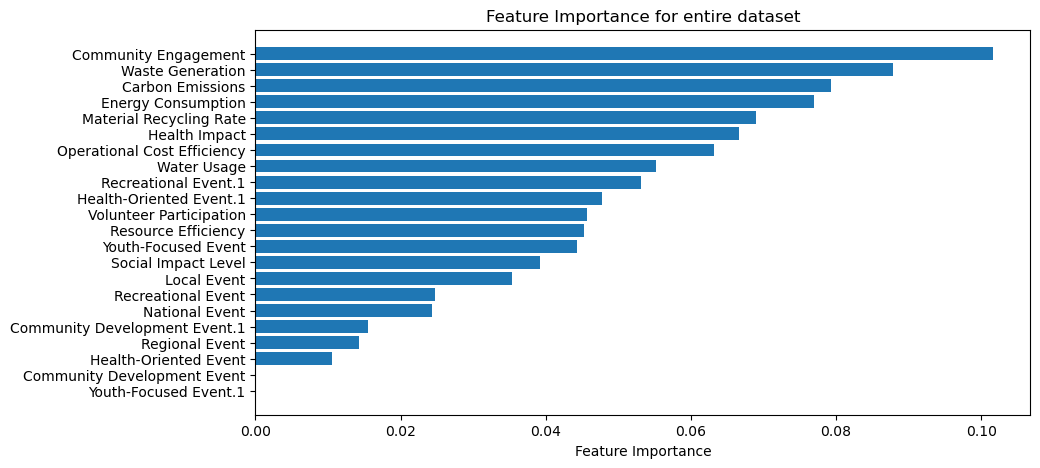

[(0.10169650890599541, 'Community Engagement'),
 (0.0878466825325228, 'Waste Generation'),
 (0.07930428314223466, 'Carbon Emissions'),
 (0.07691689962171568, 'Energy Consumption'),
 (0.06892554502651009, 'Material Recycling Rate'),
 (0.06666943965919231, 'Health Impact'),
 (0.06314154021142589, 'Operational Cost Efficiency'),
 (0.05522337236715625, 'Water Usage'),
 (0.05318584516893676, 'Recreational Event.1'),
 (0.04782238054721975, 'Health-Oriented Event.1'),
 (0.045661009870733814, 'Volunteer Participation'),
 (0.045264144840092016, 'Resource Efficiency'),
 (0.04433485448927023, 'Youth-Focused Event'),
 (0.03925820320084003, 'Social Impact Level'),
 (0.03534933281497631, 'Local Event'),
 (0.024736673062545893, 'Recreational Event'),
 (0.024385446166588443, 'National Event'),
 (0.015456841923832823, 'Community Development Event.1'),
 (0.014233696462312248, 'Regional Event'),
 (0.010587299985898581, 'Health-Oriented Event'),
 (0.0, 'Youth-Focused Event.1'),
 (0.0, 'Community Developme

In [66]:
feature_importance(X,y,'Feature Importance for entire dataset')

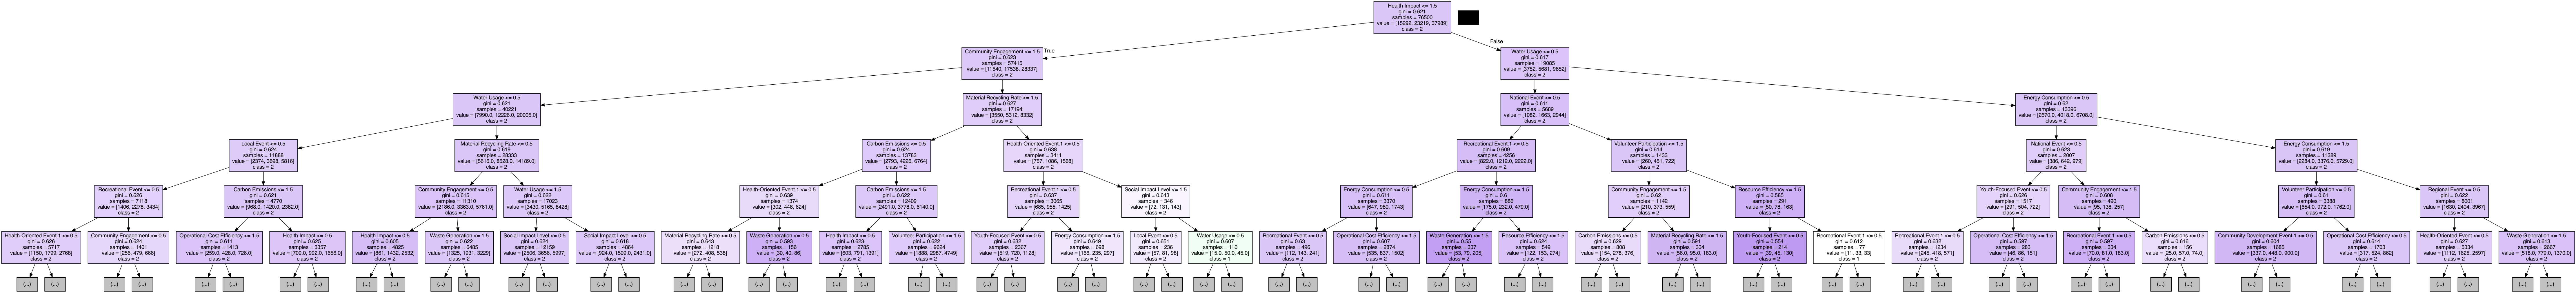

In [67]:
# Visualizing the Decision Tree
# Create the classifier
clf = DecisionTreeClassifier(max_depth=6)
# Fit the model using the training data
clf.fit(X_train, y_train) 
# Create DOT data
dot_data = tree.export_graphviz(
    clf, out_file=None, feature_names=X.columns, class_names=["0", "1", "2"], filled=True, max_depth=5
)

# Draw graph
graph = pydotplus.graph_from_dot_data(dot_data)

# Show graph
Image(graph.create_png())

In [69]:
# When saving the image, graph.write_<file_type>() must take a string object

# Save the tree as PNG
file_path = "sustainability_creator_tree.png"
graph.write_png(file_path)

True